# Subplots features

## Automatic layout

In [ ]:
import proplot as plot
for ref in (1, 2):
    f, axs = plot.subplots(
        ref=ref, nrows=3, ncols=3, wratios=(3, 2, 2),
        axwidth=1.1, share=0)
    axs[ref-1].format(
        title='reference axes', titleweight='bold',
        titleloc='uc', titlecolor='red9')
    axs[4].format(
        title='title\ntitle\ntitle',
        suptitle='Tight layout with simple grids')
    axs[1].format(ylabel='ylabel\nylabel\nylabel')
    axs[:4:2].format(xlabel='xlabel\nxlabel\nxlabel')
    axs.format(rowlabels=['Row 1', 'Row 2', 'Row 3'],
               collabels=['Column 1', 'Column 2', 'Column 3'])

In [ ]:
import proplot as plot
for ref in (4, 2):
    f, axs = plot.subplots(
        [[1, 1, 2], [3, 3, 2], [4, 5, 5], [4, 6, 6]],
        hratios=(1, 1, 2, 2), wratios=(3, 2, 3),
        ref=ref, axwidth=1.1, span=False)
    axs[ref-1].format(
        title='reference axes', titleweight='bold',
        titleloc='uc', titlecolor='red9')
    axs.format(xlabel='xlabel', ylabel='ylabel', suptitle='Super title')
    axs[0].format(xlabel='xlabel\nxlabel\nxlabel')
    axs[1].format(
        ylabel='ylabel\nylabel\nylabel', ytickloc='both',
        yticklabelloc='both', ctitle='Title')
    axs[2:4].format(
        yformatter='null', ctitle='Title',
        ytickloc='both', yticklabelloc='both')
    axs[4:].format(yformatter='null', xlabel='xlabel\nxlabel\nxlabel')
    axs.format(suptitle='Tight layout with complex grids', rowlabels=[
               'Row 1', 'Row 2', 'Row 3'], collabels=['Column 1', 'Column 2'])

## Arbitrary physical units

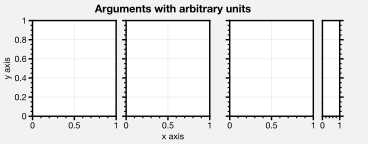

In [4]:
import proplot as plot
import numpy as np
with plot.rc.context(small='12px', large='15px', linewidth='0.5mm'):
    f, axs = plot.subplots(
        ncols=3, width='13cm', height='2in',
        wspace=('10pt', '20pt'), right='10mm')
    panel = axs[2].panel_axes('r', width='2em')
    axs.format(suptitle='Arguments with arbitrary units',
               xlabel='x axis', ylabel='y axis')
plot.rc.reset()

## Subplot numbers and labels

In [ ]:
import proplot as plot
f, axs = plot.subplots(nrows=8, ncols=8, axwidth=0.7, space=0)
axs.format(abc=True, abcloc='ur', xlabel='x axis', ylabel='y axis',
           xticks=[], yticks=[], suptitle='Flush subplot grid')

## Shared and spanning labels

In [ ]:
import proplot as plot
import numpy as np
N = 50
M = 40
state = np.random.RandomState(51423)
colors = plot.colors('grays_r', M, left=0.1, right=0.8)
datas = []
for scale in (1, 3, 7, 0.2):
    data = scale * (state.rand(N, M) - 0.5).cumsum(axis=0)[N//2:, :]
    datas.append(data)
for share in (0, 1, 2, 3):
    f, axs = plot.subplots(ncols=4, aspect=1, axwidth=1.2,
                           sharey=share, spanx=share//2)
    for ax, data in zip(axs, datas):
        ax.plot(data, cycle=colors)
        ax.format(suptitle=f'Axis-sharing level: {share}, spanning labels {["off","on"][share//2]}',
                  grid=False, xlabel='spanning', ylabel='shared')

In [ ]:
import proplot as plot
import numpy as np
plot.rc.reset()
plot.rc.cycle = 'Set3'
state = np.random.RandomState(51423)
titles = ['With redundant labels', 'Without redundant labels']
for mode in (0, 1):
    f, axs = plot.subplots(nrows=4, ncols=4, share=3*mode,
                           span=1*mode, axwidth=1)
    for ax in axs:
        ax.plot((state.rand(100, 20) - 0.4).cumsum(axis=0))
    axs.format(
        xlabel='xlabel', ylabel='ylabel', suptitle=titles[mode],
        abc=mode, abcloc='ul',
        grid=False, xticks=25, yticks=5)